In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from statsmodels.graphics.regressionplots import influence_plot
from scipy.stats import yeojohnson

In [5]:
df=pd.read_csv("E:\DS\datasets\Toyoto_Corrola.csv")
df.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [7]:
df.Cylinders.value_counts()
# drop cylinders because all r 4 cylinders

Cylinders
4    1436
Name: count, dtype: int64

In [8]:
df.drop(['Id','Model','Cylinders'],axis=1,inplace=True)

In [9]:
df.head()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [10]:
df[df.duplicated(keep=False)]

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
112,24950,8,13253,116,5,5,1320
113,24950,8,13253,116,5,5,1320


In [11]:
df.drop_duplicates(inplace=True,ignore_index=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


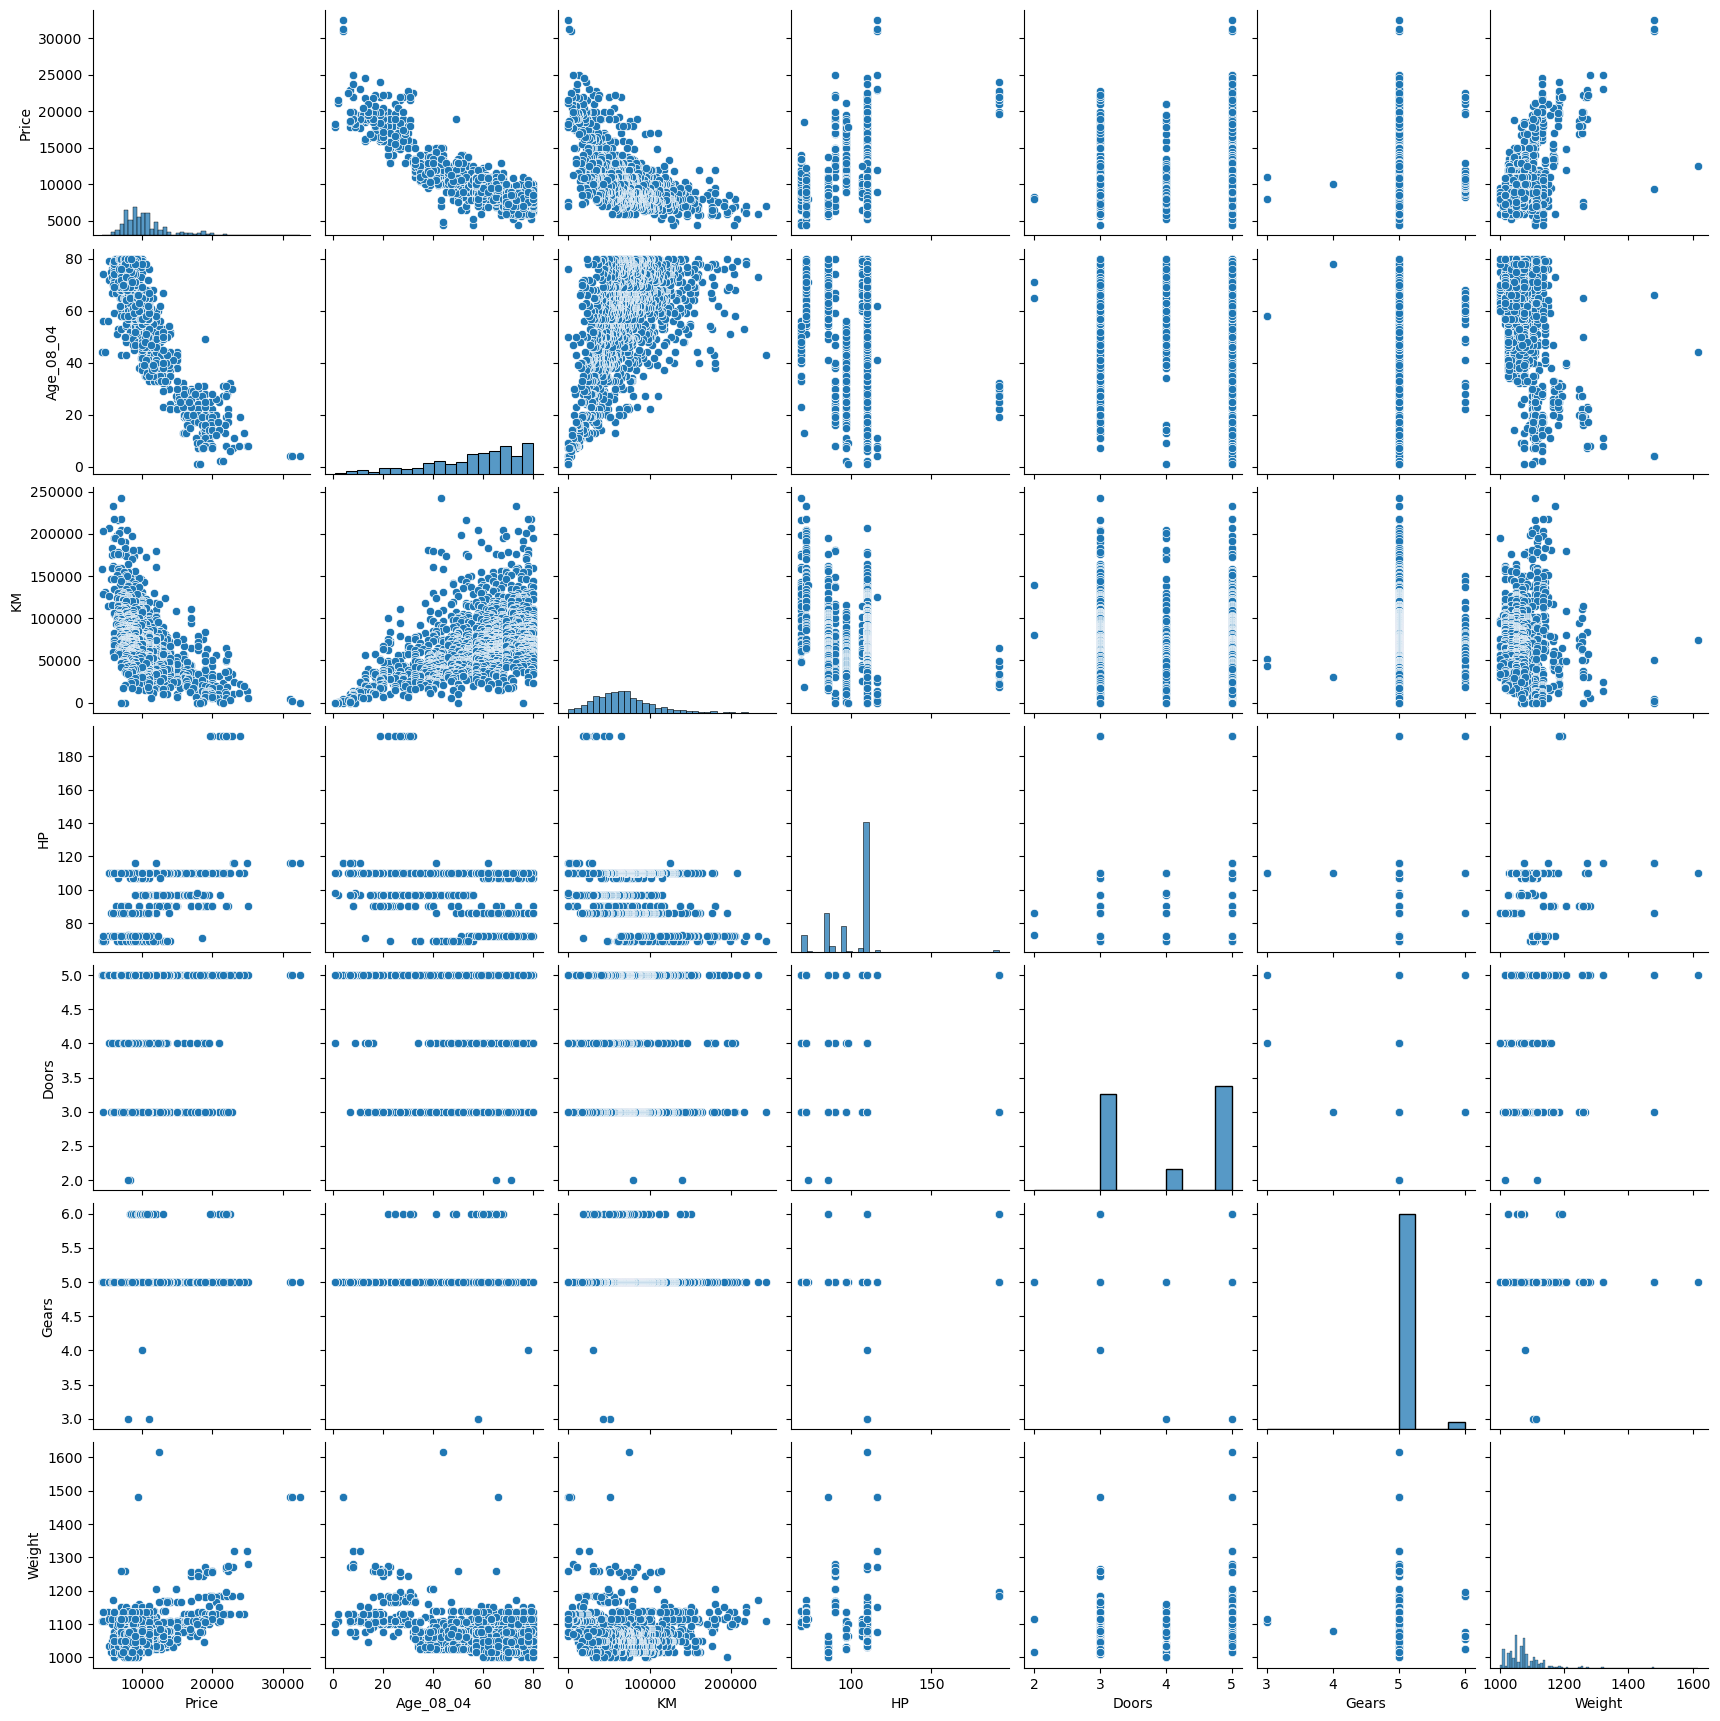

In [12]:
# see correlation
sns.pairplot(df)

In [13]:
df.corr()
# see doors & gears have weak corr with price

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.183604,0.063831,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.146929,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.035193,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.091803,0.209642,0.087143
Doors,0.183604,-0.146929,-0.035193,0.091803,1.000000,-0.160101,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,-0.160101,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.301734,0.021238,1.000000


In [14]:
# build a model using age,km,hp,weight
model=smf.ols('Price~Age_08_04+HP+KM+Weight',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     2206.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:05:20   Log-Likelihood:                -12376.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1430   BIC:                         2.479e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3858.7559    940.086     -4.105      0.000   -5702.852   -2014.660
Age_08_04   -122.4705      2.622    -46.712      0.000    -127.613    -117.327
HP            30.2027      2.538     11.901      0.000      25.224      35.181
KM            -0.0196      0.001    -16.217      0.000      -0.022      -0.017
Weight        18.3840      0.807     22.776      0.000      16.801      19.967
==============================================================================
Omnibus:                      192.444   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1462.386
Skew:                          -0.364   Prob(JB):                         0.00
Kurtosis:                       7.892   Cond. No.                     2.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
mean_squared_error(df.Price,model.fittedvalues)

1814769.0648676855

# lets check the assumptions of errors

In [16]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

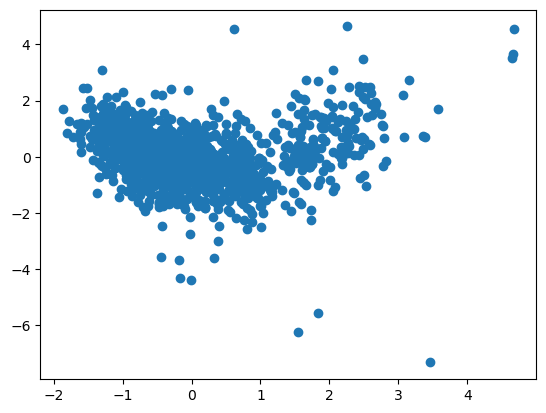

In [17]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
# not autocorrelated but heteroscadasticit

(array([  2.,   1.,   2.,   6.,  87., 540., 628., 145.,  18.,   6.]),
 array([-9862.73619796, -8251.86423115, -6640.99226433, -5030.12029751,
        -3419.24833069, -1808.37636388,  -197.50439706,  1413.36756976,
         3024.23953658,  4635.11150339,  6245.98347021]),
 <BarContainer object of 10 artists>)

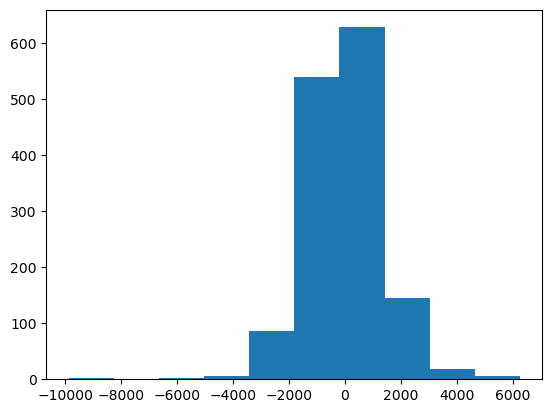

In [18]:
plt.hist(model.resid)
# negatively skewed

### reason coud be var having outliers

(array([121., 331., 417., 301., 140.,  64.,  30.,  17.,  12.,   2.]),
 array([1.000000e+00, 2.430090e+04, 4.860080e+04, 7.290070e+04,
        9.720060e+04, 1.215005e+05, 1.458004e+05, 1.701003e+05,
        1.944002e+05, 2.187001e+05, 2.430000e+05]),
 <BarContainer object of 10 artists>)

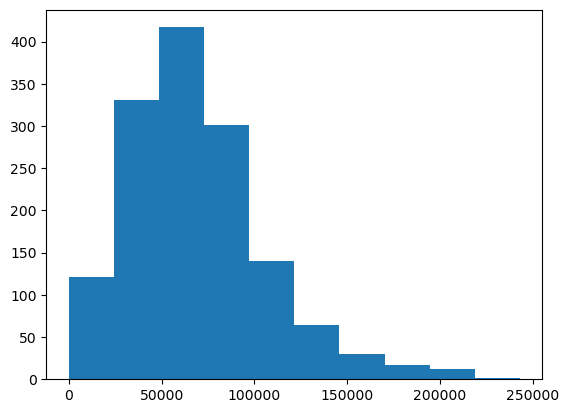

In [19]:
plt.hist(df.KM)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


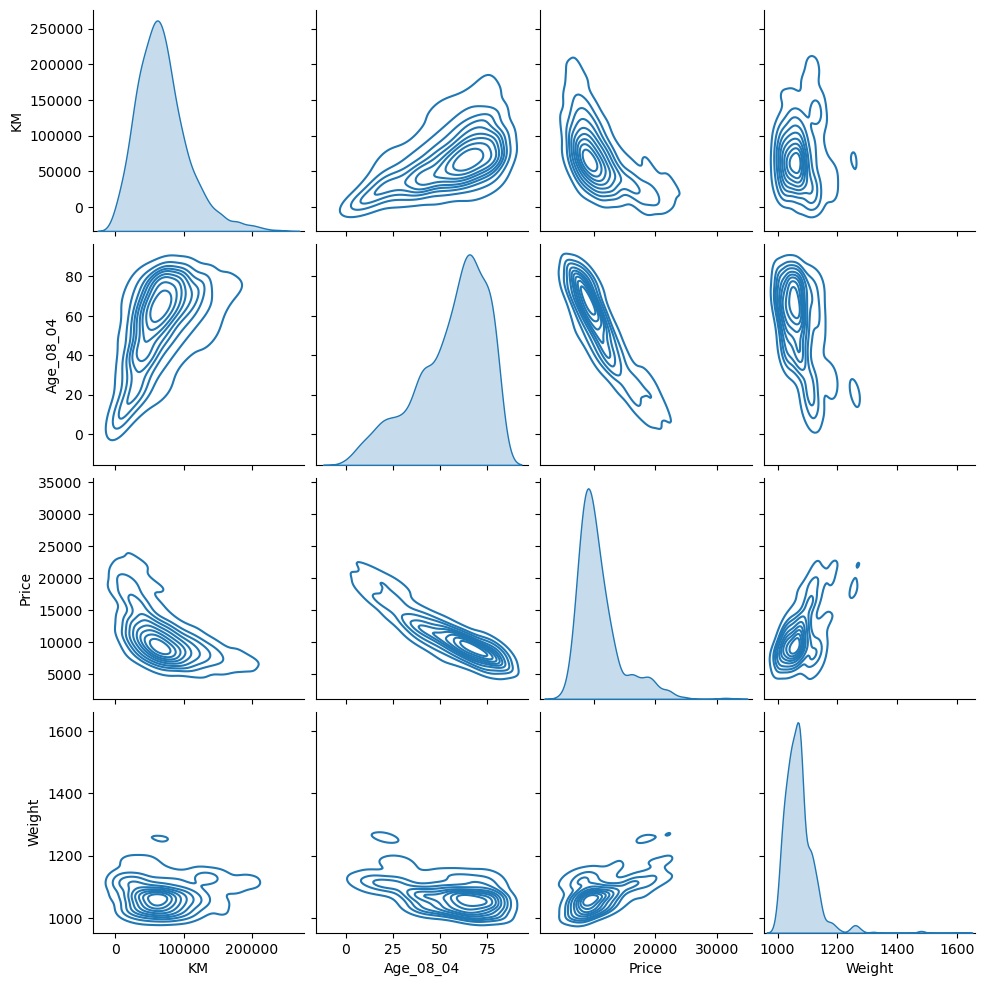

In [20]:
sns.pairplot(df[['KM','Age_08_04','Price','Weight']],kind='kde')
#price & weight r highly skewed

{'whiskers': [<matplotlib.lines.Line2D at 0x1decf6a88d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1decf811f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1decf7e32d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1decf812f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1decdcfaa90>],
 'means': []}

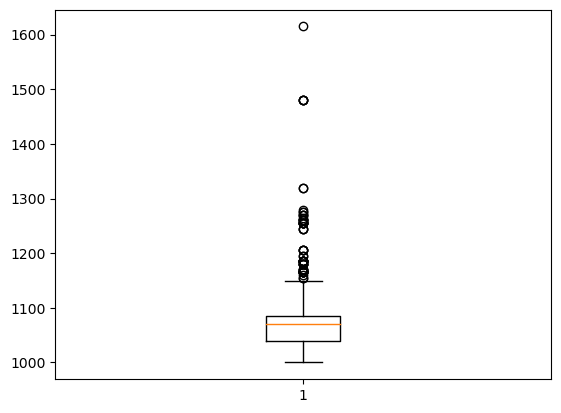

In [21]:
plt.boxplot(df.Weight)

In [22]:
model_influence=model.get_influence()
c,_=model_influence.cooks_distance

<StemContainer object of 3 artists>

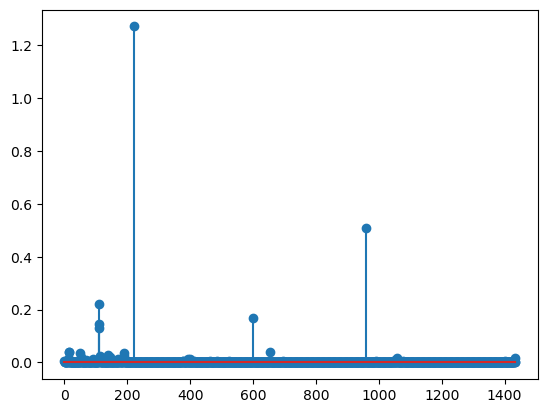

In [23]:
plt.stem(np.arange(len(df)),np.round(c, 3))

In [24]:
df['log_price']=np.log(df.Price)
df['log_wt']= np.log(df.Weight)
df['log_km']=np.log(df.KM)

In [25]:
model1=smf.ols('log_price~Age_08_04+log_km+HP+log_wt',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1566.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:05:37   Log-Likelihood:                 921.69
No. Observations:                1435   AIC:                            -1833.
Df Residuals:                    1430   BIC:                            -1807.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2915      0.588      7.295      0.000       3.137       5.445
Age_08_04     -0.0121      0.000    -51.619      0.000      -0.013      -0.012
log_km        -0.0178      0.004     -4.880      0.000      -0.025      -0.011
HP             0.0034      0.000     15.067      0.000       0.003       0.004
log_wt         0.7829      0.084      9.354      0.000       0.619       0.947
==============================================================================
Omnibus:                      349.088   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1592.143
Skew:                          -1.077   Prob(JB):                         0.00
Kurtosis:                       7.689   Cond. No.                     2.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

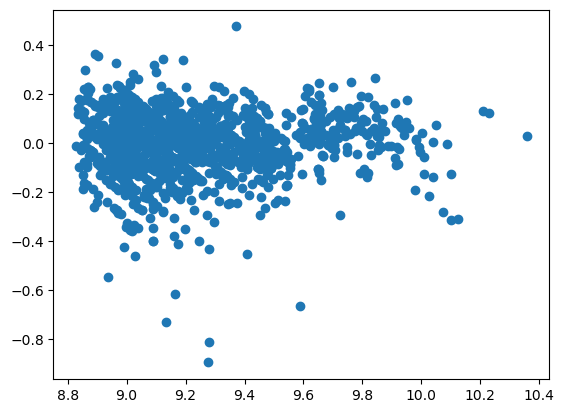

In [26]:
plt.scatter(model1.fittedvalues,model1.resid)

(array([  2.,   2.,   2.,  14.,  56., 266., 657., 394.,  38.,   4.]),
 array([-0.89669258, -0.75934904, -0.6220055 , -0.48466196, -0.34731842,
        -0.20997488, -0.07263134,  0.0647122 ,  0.20205574,  0.33939928,
         0.47674282]),
 <BarContainer object of 10 artists>)

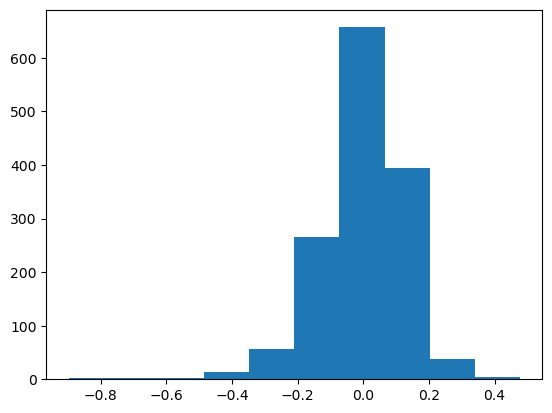

In [27]:
plt.hist(model1.resid)

<StemContainer object of 3 artists>

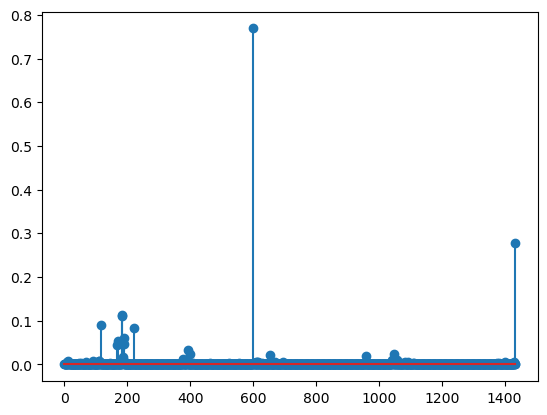

In [28]:
model_influence=model1.get_influence()
c,_=model_influence.cooks_distance
plt.stem(np.arange(len(df)),np.round(c, 3))

In [29]:
(np.argmax(c),np.max(c))

(600, 0.7690404263773399)

In [30]:
df.drop(221,axis=0,inplace=True)

In [31]:
model2=smf.ols('Price~Age_08_04+KM+HP+Weight',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     2205.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:05:38   Log-Likelihood:                -12368.
No. Observations:                1434   AIC:                         2.475e+04
Df Residuals:                    1429   BIC:                         2.477e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3848.8196    940.359     -4.093      0.000   -5693.452   -2004.188
Age_08_04   -122.5323      2.624    -46.701      0.000    -127.679    -117.385
KM            -0.0196      0.001    -16.191      0.000      -0.022      -0.017
HP            30.2372      2.539     11.910      0.000      25.257      35.217
Weight        18.3740      0.807     22.756      0.000      16.790      19.958
==============================================================================
Omnibus:                      192.245   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1457.674
Skew:                          -0.365   Prob(JB):                         0.00
Kurtosis:                       7.885   Cond. No.                     2.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# outlier detection & removal

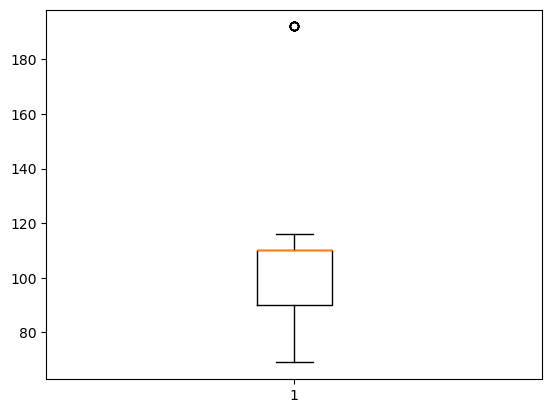

In [32]:
box = plt.boxplot(df.HP)

In [33]:
out=[]
for item in box["fliers"]:# outliers also called as fliers
    out.append(item.get_ydata())# get ydata means y axis data
    
a=np.min(out)
a

192

In [34]:
[item.get_ydata()[1] for item in box['whiskers']]

[69.0, 116.0]

17250

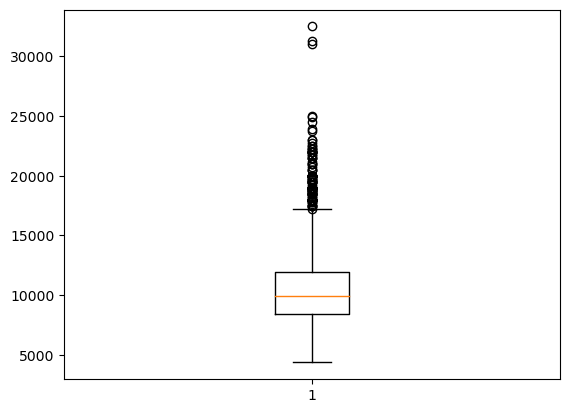

In [35]:
box = plt.boxplot(df.Price)
out=[]
for item in box["fliers"]:# outliers also called as fliers
    out.append(item.get_ydata())# get ydata means y axis data
    
a=np.min(out)
a

In [36]:
df[df.KM>=154462]

,Price,Age_08_04,KM,HP,Doors,Gears,Weight,log_price,log_wt,log_km
185,6950,43,243000,69,3,5,1110,8.846497,7.012115,12.400817
186,9500,38,180638,90,4,5,1160,9.159047,7.056175,12.104250
187,11950,40,179860,90,5,5,1205,9.388487,7.094235,12.099934
188,7750,43,178858,110,3,5,1084,8.955448,6.988413,12.094347
189,11950,40,161000,69,3,5,1105,9.388487,7.007601,11.989160
190,4350,44,158320,69,5,5,1110,8.377931,7.012115,11.972374
377,6500,53,216000,69,3,5,1110,8.779557,7.012115,12.283034
378,6400,51,198167,69,4,5,1095,8.764053,6.998510,12.196865
379,7000,53,176000,69,3,5,1105,8.853665,7.007601,12.078239
380,7750,54,174139,72,4,5,1100,8.955448,7.003065,12.067609


In [37]:
new_df=df.copy()
new_df.loc[new_df.KM>154462,'KM']=15446
new_df.loc[new_df.Weight>1155,'Weight']=1155
#new_df.loc[new_df.Price>=17250,'Price']=17250
new_df.loc[new_df.HP>=192,'HP']=116#wiskers
new_df.loc[new_df.Age_08_04<=4,'Age_08_04']=6
new_df['ln_price']=np.log(new_df.Price)

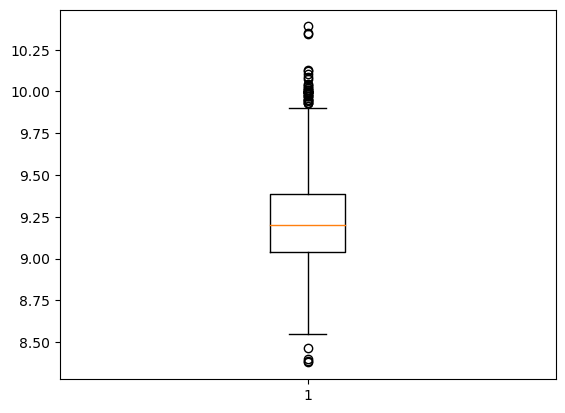

In [38]:
box=plt.boxplot(np.log(new_df.Price))

17250

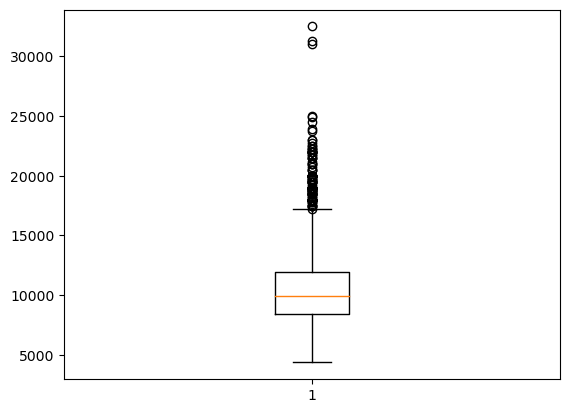

In [39]:
box = plt.boxplot(df.Price)
out=[]
for item in box["fliers"]:# outliers also called as fliers
    out.append(item.get_ydata())# get ydata means y axis data
    
a=np.min(out)
a

In [40]:
[item.get_ydata()[1] for item in box['whiskers']]

[4350.0, 17200.0]

In [41]:
new_df.Age_08_04.skew()

-0.8149016005335433

{'whiskers': [<matplotlib.lines.Line2D at 0x1ded130cd50>,
 'caps': [<matplotlib.lines.Line2D at 0x1ded14ed390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ded14e3090>],
 'medians': [<matplotlib.lines.Line2D at 0x1ded14ee9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1decff7b710>],
 'means': []}

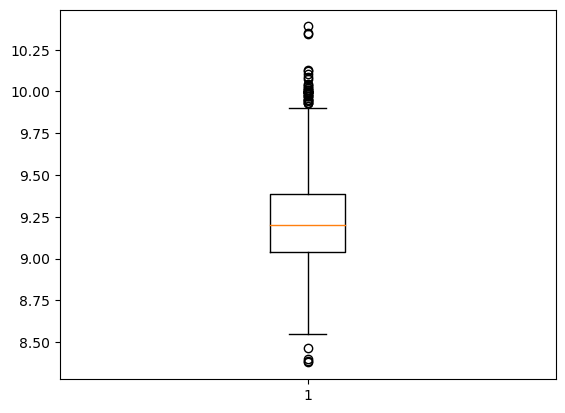

In [42]:
plt.boxplot(new_df.ln_price)

In [43]:
model_new = smf.ols('ln_price~Age_08_04+HP+KM+Weight',data=new_df).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1493.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:05:38   Log-Likelihood:                 893.08
No. Observations:                1434   AIC:                            -1776.
Df Residuals:                    1429   BIC:                            -1750.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5634      0.123     69.794      0.000       8.323       8.804
Age_08_04     -0.0121      0.000    -49.129      0.000      -0.013      -0.012
HP             0.0037      0.000     13.697      0.000       0.003       0.004
KM         -7.975e-07   1.25e-07     -6.379      0.000   -1.04e-06   -5.52e-07
Weight         0.0010      0.000      9.133      0.000       0.001       0.001
==============================================================================
Omnibus:                      318.967   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1487.114
Skew:                          -0.971   Prob(JB):                         0.00
Kurtosis:                       7.595   Cond. No.                     2.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

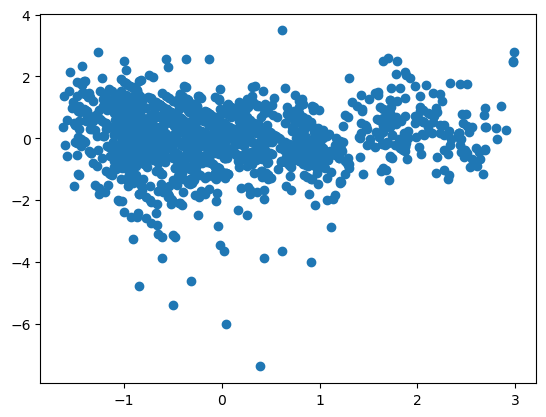

In [44]:
plt.scatter(get_standardized_values(model_new.fittedvalues),
            get_standardized_values(model_new.resid))

(array([  1.,   2.,   2.,  11.,  30., 163., 637., 491.,  85.,  12.]),
 array([-0.95865721, -0.81752795, -0.67639868, -0.53526941, -0.39414015,
        -0.25301088, -0.11188161,  0.02924766,  0.17037692,  0.31150619,
         0.45263546]),
 <BarContainer object of 10 artists>)

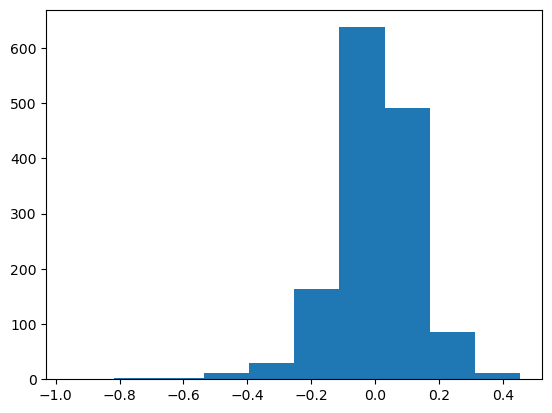

In [45]:
plt.hist(model_new.resid)

In [46]:
mean_squared_error(new_df.ln_price,model_new.fittedvalues)

0.01684908859770809

In [47]:
new_df=df.copy()
new_df.loc[new_df.KM>154462,'KM']=151300
new_df.loc[new_df.Weight>1155,'Weight']=1150
new_df.loc[new_df.HP>=192,'HP']=116#wiskers
new_df.loc[new_df.Age_08_04<=4,'Age_08_04']=6
#new_df.loc[new_df.Price>17250,'Price']=17200
new_df['ln_price']=np.log(new_df.Price)

In [48]:
new_df.dropna(inplace=True,ignore_index=True)

In [49]:
model_1=smf.ols('ln_price~Age_08_04+HP+KM+Weight',data=new_df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1796.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:05:39   Log-Likelihood:                 1001.9
No. Observations:                1434   AIC:                            -1994.
Df Residuals:                    1429   BIC:                            -1968.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1901      0.117     69.767      0.000       7.960       8.420
Age_08_04     -0.0104      0.000    -42.164      0.000      -0.011      -0.010
HP             0.0024      0.000      9.181      0.000       0.002       0.003
KM         -2.054e-06   1.22e-07    -16.884      0.000   -2.29e-06   -1.82e-06
Weight         0.0014      0.000     13.839      0.000       0.001       0.002
==============================================================================
Omnibus:                      246.221   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1063.588
Skew:                          -0.755   Prob(JB):                    1.11e-231
Kurtosis:                       6.940   Cond. No.                     2.80e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

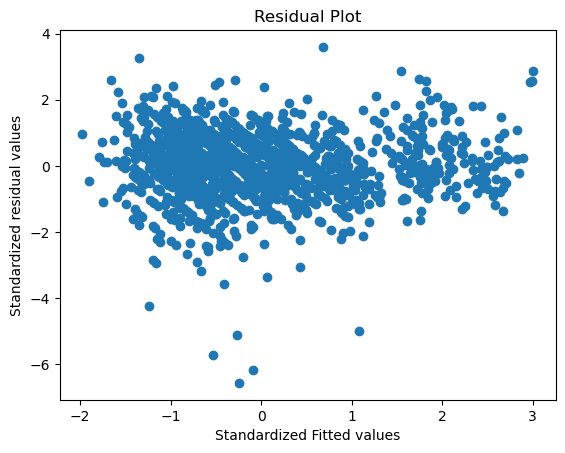

In [51]:
plt.scatter(get_standardized_values(model_1.fittedvalues),
            get_standardized_values(model_1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

(array([  3.,   2.,   2.,   9.,  69., 335., 606., 343.,  58.,   7.]),
 array([-0.78932625, -0.66712273, -0.54491921, -0.42271569, -0.30051216,
        -0.17830864, -0.05610512,  0.0660984 ,  0.18830192,  0.31050544,
         0.43270896]),
 <BarContainer object of 10 artists>)

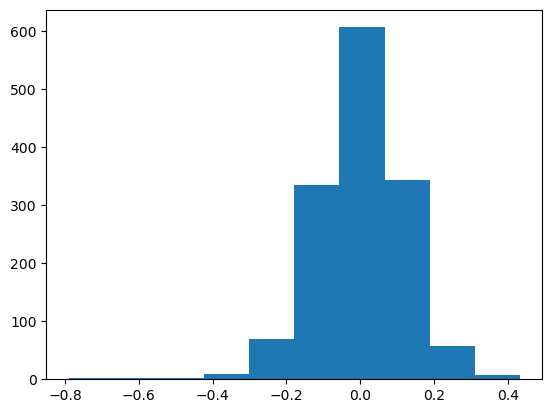

In [52]:
plt.hist(model_1.resid)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


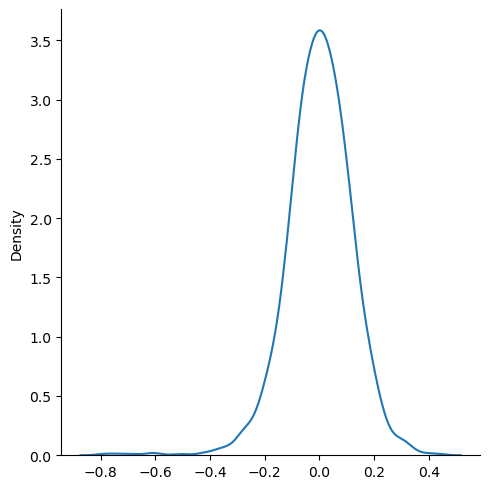

In [53]:
sns.displot(model_1.resid,kind='kde')

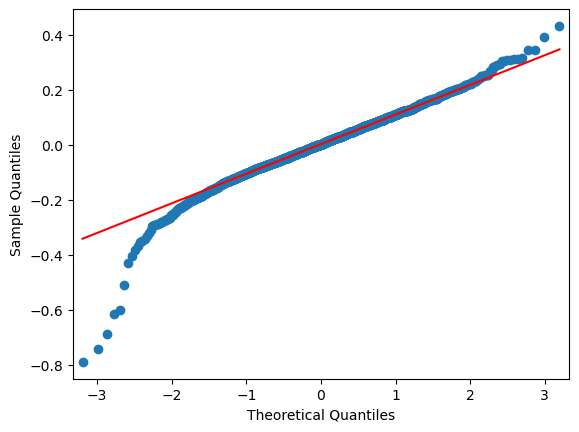

In [54]:
qqplot=sm.qqplot(model_1.resid,line='q')

In [55]:
mean_squared_error(new_df.ln_price,model_1.fittedvalues)

0.014475557958472673

In [56]:
new_df

,Price,Age_08_04,KM,HP,Doors,Gears,Weight,log_price,log_wt,log_km,ln_price
0,13500,23,46986,90,3,5,1150,9.510445,7.060476,10.757605,9.510445
1,13750,23,72937,90,3,5,1150,9.528794,7.060476,11.197351,9.528794
2,13950,24,41711,90,3,5,1150,9.543235,7.060476,10.638520,9.543235
3,14950,26,48000,90,3,5,1150,9.612467,7.060476,10.778956,9.612467
4,13750,30,38500,90,3,5,1150,9.528794,7.064759,10.558414,9.528794
...,...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,3,5,1025,8.922658,6.932448,9.930324,8.922658
1430,10845,72,19000,86,3,5,1015,9.291459,6.922644,9.852194,9.291459
1431,8500,71,17016,86,3,5,1015,9.047821,6.922644,9.741909,9.047821
1432,7250,70,16916,86,3,5,1015,8.888757,6.922644,9.736015,8.888757


In [57]:
model_influence= model_1.get_influence()
(c,_)=model_influence.cooks_distance

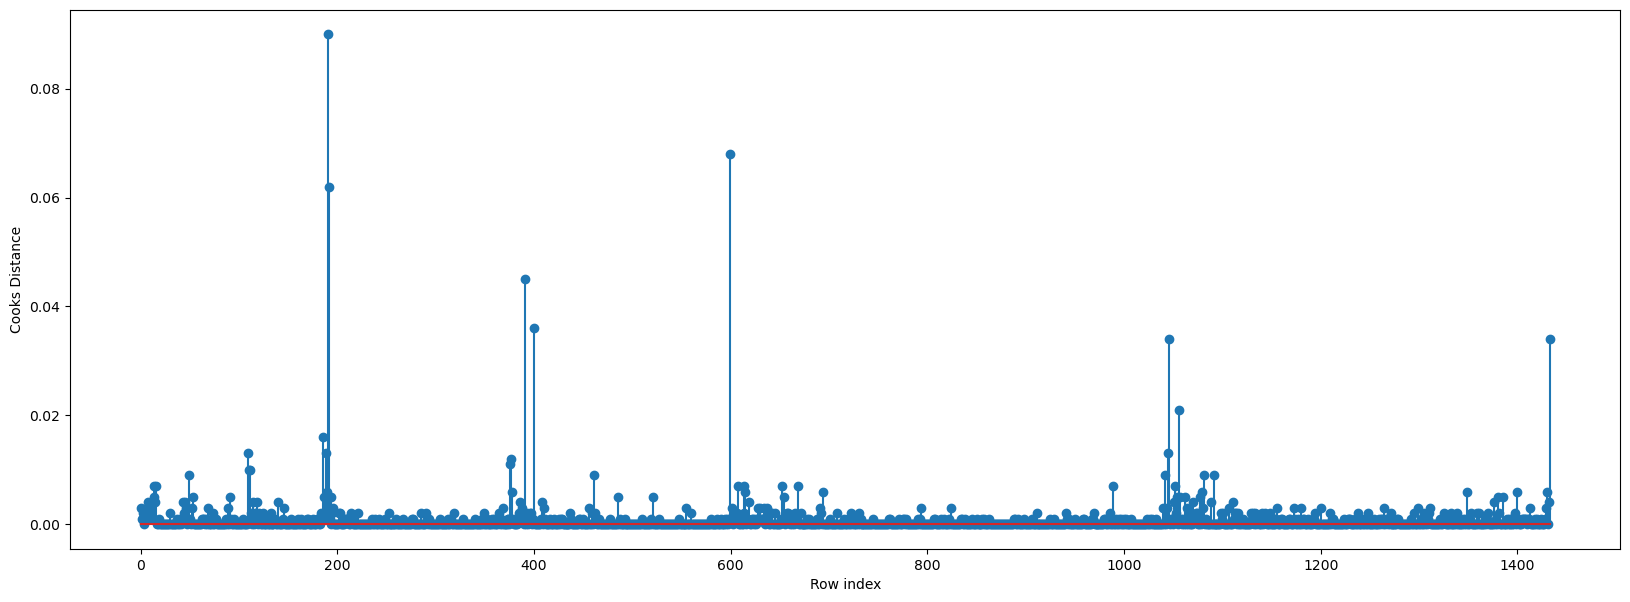

In [58]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(new_df)),np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [59]:
train,test=train_test_split(new_df,test_size=0.2,random_state=4)

In [60]:
train.shape,test.shape

((1147, 11), (287, 11))

In [61]:
train.head()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight,log_price,log_wt,log_km,ln_price
316,9900,42,37000,97,3,5,1025,9.200290,6.932448,10.518673,9.200290
1310,9950,79,68945,110,5,5,1085,9.205328,6.989335,11.141064,9.205328
1137,7950,74,104150,110,3,5,1050,8.980927,6.956545,11.553587,8.980927
824,6950,58,69022,86,5,5,1035,8.846497,6.942157,11.142181,8.846497
326,12950,35,33258,110,5,5,1075,9.468851,6.980076,10.412051,9.468851


In [62]:
fm=smf.ols('ln_price~Age_08_04+HP+KM+Weight',data=train).fit()
fm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1412.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:05:42   Log-Likelihood:                 801.59
No. Observations:                1147   AIC:                            -1593.
Df Residuals:                    1142   BIC:                            -1568.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1891      0.131     62.572      0.000       7.932       8.446
Age_08_04     -0.0104      0.000    -37.599      0.000      -0.011      -0.010
HP             0.0025      0.000      8.582      0.000       0.002       0.003
KM         -2.092e-06   1.36e-07    -15.353      0.000   -2.36e-06   -1.82e-06
Weight         0.0014      0.000     12.347      0.000       0.001       0.002
==============================================================================
Omnibus:                      171.077   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              639.160
Skew:                          -0.681   Prob(JB):                    1.62e-139
Kurtosis:                       6.394   Cond. No.                     2.80e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
test_predict=fm.predict(test[['Age_08_04','HP','KM','Weight']])

In [64]:
mean_squared_error(train.ln_price,fm.fittedvalues,squared=False)

C:\Users\dushy\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.12029648961831702

In [65]:
mean_squared_error(test.ln_price,test_predict,squared=False)

C:\Users\dushy\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.12059546216664128

In [73]:
train.drop(['Price','KM','Weight','log_price'],axis=1,inplace=True)
test.drop(['Price','KM','Weight','log_price'],axis=1,inplace=True)

In [74]:
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [75]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

0.016500380981946713
     Columns  Coefficient Estimate
0  Age_08_04             -0.012530
1         HP              0.003404
2      Doors              0.014532
3      Gears              0.085532
4     log_wt              0.477210
5     log_km             -0.018251


In [76]:
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 0.023199291623986675
     Columns  Coefficient Estimate
0  Age_08_04             -0.010997
1         HP              0.000000
2      Doors              0.000000
3      Gears              0.000000
4     log_wt              0.000000
5     log_km             -0.000000


### comparision
* by applying these regularization algorithims no need to check multicollinearity b/w input variables
* Ridge will decrease the weightage to the features having multicollinearity
* Lasso will make the weightage to zero for features having multicliiinearity
* we can see the Ridge is performing better than Laso by utilising all features

## 1. Normalization & Standardization

Both **Normalization** and **Standardization** are techniques used to rescale features to ensure that they are on a comparable scale. They are essential in preparing data for machine learning models, especially when dealing with algorithms sensitive to feature scales (e.g., k-NN, logistic regression, neural networks).

### **Normalization:**
Normalization scales the data to a fixed range, typically between 0 and 1, ensuring that all features have equal weight regardless of their original scale.

- **Formula for Min-Max Normalization**:
  
  \[
  X_{\text{norm}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
  \]
  
  Here, \(X_{\min}\) and \(X_{\max}\) are the minimum and maximum values of feature \(X\), and \(X_{\text{norm}}\) is the normalized value.

- **When to Use Normalization**:
  - Useful when data doesn't follow a Gaussian distribution (e.g., uniformly distributed).
  - Important for algorithms that rely on distances (e.g., k-NN, SVM, neural networks).

### **Standardization:**
Standardization transforms the data to have a mean of 0 and a standard deviation of 1. This is also known as Z-score normalization.

- **Formula for Standardization**:
  
  \[
  X_{\text{std}} = \frac{X - \mu}{\sigma}
  \]
  
  Where \( \mu \) is the mean of the feature, and \( \sigma \) is its standard deviation.

- **When to Use Standardization**:
  - When features are normally distributed (or close to it).
  - It is commonly used for algorithms that assume a normal distribution or are sensitive to feature scales (e.g., linear regression, logistic regression, PCA).

### **Why Are They Helpful?**
- **Improved Model Performance**: Some machine learning algorithms (e.g., gradient-based algorithms) can perform poorly or converge slowly if features are on different scales.
- **Faster Convergence**: Algorithms like gradient descent optimize faster when all the features are on a similar scale.
- **Equal Weighting of Features**: Normalization and standardization prevent features with larger scales from dominating the learning process, ensuring that each feature contributes equally to the model.

---

## 2. Techniques to Address Multicollinearity in Multiple Linear Regression

**Multicollinearity** occurs when two or more predictor variables in a multiple regression model are highly correlated, which can inflate the variance of the estimated coefficients and make the model unstable. Here are several techniques to address multicollinearity:

### 1. **Variance Inflation Factor (VIF)**
   - **VIF** quantifies how much the variance of a regression coefficient is inflated due to multicollinearity. 
   - **Steps to Address Multicollinearity**:
     - Calculate the VIF for each feature.
     - If the VIF is greater than a threshold (commonly 5 or 10), it indicates multicollinearity.
     - Remove or combine features with high VIF values to reduce multicollinearity.

   - **Formula**:
     
     \[
     VIF = \frac{1}{1 - R^2}
     \]
     
     Where \( R^2 \) is the coefficient of determination for the regression of one feature against the other features.

### 2. **Remove One of the Highly Correlated Variables**
   - If two or more variables are highly correlated, you can drop one of the redundant variables to reduce multicollinearity.
   - **Correlation Matrix**: Calculate a correlation matrix to identify pairs of highly correlated variables (correlation coefficient close to 1 or -1).

### 3. **Principal Component Analysis (PCA)**
   - **PCA** is a dimensionality reduction technique that transforms the original features into a new set of uncorrelated components.
   - It projects the data onto principal components (linear combinations of the original variables) that capture the most variance, addressing multicollinearity by reducing the feature set.

### 4. **Ridge Regression (L2 Regularization)**
   - **Ridge regression** adds a penalty to the regression model based on the sum of the squared coefficients, which can shrink the coefficients of correlated predictors, reducing the effect of multicollinearity.
   - **Formula**:
     
     \[
     \text{Loss Function} = \text{RSS} + \lambda \sum \beta_j^2
     \]
     
     Where \( \lambda \) is the regularization parameter and \( \beta_j \) are the regression coefficients.

### 5. **Lasso Regression (L1 Regularization)**
   - **Lasso regression** adds an L1 penalty to the regression model, which can force some coefficients to become zero, effectively selecting a subset of predictors and handling multicollinearity.
   - **Formula**:
     
     \[
     \text{Loss Function} = \text{RSS} + \lambda \sum |\beta_j|
     \]
     
     Lasso can both shrink and eliminate irrelevant predictors, making it useful in addressing multicollinearity.

### 6. **Data Collection**
   - In some cases, multicollinearity can be due to a small sample size. Increasing the dataset size can sometimes reduce multicollinearity because more data can help better distinguish the relationships between variables.

### 7. **Combine Correlated Variables**
   - You can combine two or more correlated variables into a single feature (e.g., by taking the average or sum), reducing the number of features and mitigating multicollinearity.

---

### Conclusion

- **Normalization** and **Standardization** ensure that all features contribute equally to the model and improve model performance by putting features on a comparable scale.
- **Multicollinearity** can be addressed by calculating **VIF**, removing highly correlated variables, using **PCA**, or applying **regularization techniques** like Ridge or Lasso regression. Each technique helps improve model stability and interpretability.
